In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [8]:
#df = pd.read_csv('G:\\upto_2018_data_notepad.csv')
df = pd.read_csv('G:\\upto_2018_data_notepad.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [10]:
df

,ProductModel,Imei_One,Imei_Tow,RegistrationDate,Color,Updatedby
0,Primo GF2,356580066293847,356580066293854,1/1/2014,BL-1,Order 2
1,Primo D3,355760058220187,355760058220195,1/1/2014,B-1,Order 1
2,Primo X2 Mini,862583023007331,NaN,1/1/2014,W-1,Order 1
3,Primo D2,355760056103708,355760056185705,1/1/2014,B-1,Order 1
4,Primo GF2,356580066238560,356580066238578,1/1/2014,BL-1,Order 2
...,...,...,...,...,...,...
7372491,Primo GF7,358184090555905,358184090555913,12/31/2018,Blue,Order 4
7372492,Olvio MH16,355078090232528,355078090232536,12/31/2018,Golden,Order 1
7372493,Primo E8i,353807091062225,353807091062233,12/31/2018,Black,Order 5
7372494,Olvio ML13,356308090521011,356308090521029,12/31/2018,Black+Light Blue,Order 1


In [12]:
df.count()

ProductModel        7372485
Imei_One            7372496
Imei_Tow            7299970
RegistrationDate    7372485
Color               7372473
Updatedby           7372474
dtype: int64

In [13]:
df.isnull().values.any()

True

In [14]:
df.isnull().values.sum()

72593

In [15]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

ProductModel           11
Imei_Tow            72526
RegistrationDate       11
Color                  23
Updatedby              22
dtype: int64

In [16]:
print(df[df.isnull().any(axis=1)][null_columns].head())

     ProductModel Imei_Tow RegistrationDate Color Updatedby
2   Primo X2 Mini      NaN         1/1/2014   W-1   Order 1
8   Primo X2 Mini      NaN         1/1/2014   B-1   Order 2
10        Walpad7      NaN         1/1/2014   B-1   Order 1
33       Primo X2      NaN         1/1/2014   B-1   Order 3
35  Primo X2 Mini      NaN         1/1/2014   B-1   Order 2


In [18]:
df.drop(['Imei_Tow','Color','Updatedby'], axis=1,inplace=True)

In [19]:
df

,ProductModel,Imei_One,RegistrationDate
0,Primo GF2,356580066293847,1/1/2014
1,Primo D3,355760058220187,1/1/2014
2,Primo X2 Mini,862583023007331,1/1/2014
3,Primo D2,355760056103708,1/1/2014
4,Primo GF2,356580066238560,1/1/2014
...,...,...,...
7372491,Primo GF7,358184090555905,12/31/2018
7372492,Olvio MH16,355078090232528,12/31/2018
7372493,Primo E8i,353807091062225,12/31/2018
7372494,Olvio ML13,356308090521011,12/31/2018


In [20]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

ProductModel        11
RegistrationDate    11
dtype: int64

In [21]:
df.count()

ProductModel        7372485
Imei_One            7372496
RegistrationDate    7372485
dtype: int64

In [22]:
#delete Null from df
df = df.dropna(how='any',axis=0) 

In [23]:
df

,ProductModel,Imei_One,RegistrationDate
0,Primo GF2,356580066293847,1/1/2014
1,Primo D3,355760058220187,1/1/2014
2,Primo X2 Mini,862583023007331,1/1/2014
3,Primo D2,355760056103708,1/1/2014
4,Primo GF2,356580066238560,1/1/2014
...,...,...,...
7372491,Primo GF7,358184090555905,12/31/2018
7372492,Olvio MH16,355078090232528,12/31/2018
7372493,Primo E8i,353807091062225,12/31/2018
7372494,Olvio ML13,356308090521011,12/31/2018


In [24]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [25]:
df.count()

ProductModel        7372474
Imei_One            7372474
RegistrationDate    7372474
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7372474 entries, 0 to 7372495
Data columns (total 3 columns):
ProductModel        object
Imei_One            object
RegistrationDate    object
dtypes: object(3)
memory usage: 225.0+ MB


In [36]:
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], format = '%m/%d/%Y', errors= 'coerce')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df

,ProductModel,Imei_One,RegistrationDate
0,Primo GF2,356580066293847,2014-01-01
1,Primo D3,355760058220187,2014-01-01
2,Primo X2 Mini,862583023007331,2014-01-01
3,Primo D2,355760056103708,2014-01-01
4,Primo GF2,356580066238560,2014-01-01
...,...,...,...
7372491,Primo GF7,358184090555905,2018-12-31
7372492,Olvio MH16,355078090232528,2018-12-31
7372493,Primo E8i,353807091062225,2018-12-31
7372494,Olvio ML13,356308090521011,2018-12-31


C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


TypeError: invalid type promotion

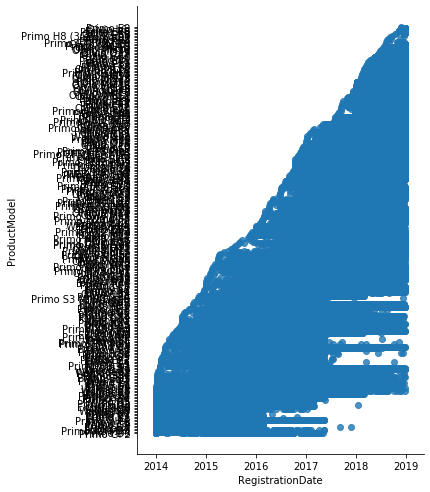

In [38]:
sns.pairplot(df, x_vars=['RegistrationDate'], y_vars='ProductModel', height=7, aspect=0.7, kind='reg')

In [39]:
df

,ProductModel,Imei_One,RegistrationDate
0,Primo GF2,356580066293847,2014-01-01
1,Primo D3,355760058220187,2014-01-01
2,Primo X2 Mini,862583023007331,2014-01-01
3,Primo D2,355760056103708,2014-01-01
4,Primo GF2,356580066238560,2014-01-01
...,...,...,...
7372491,Primo GF7,358184090555905,2018-12-31
7372492,Olvio MH16,355078090232528,2018-12-31
7372493,Primo E8i,353807091062225,2018-12-31
7372494,Olvio ML13,356308090521011,2018-12-31


In [ ]:
df

In [ ]:
ax = sns.scatterplot(x="ProductModel", y="RegistrationDate", hue="Imei_One", data=df)

In [42]:
ax